In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
pyplot.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140,3449,10.5,70,usa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    int64  
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# Memeriksa apakah ada nilai yang hilang
print(df[['mpg', 'horsepower','cylinders','displacement','weight', 'acceleration', 'model_year', 'origin']].isnull().sum()) # Removed extra space from 'origin '

df = df[['mpg', 'horsepower','cylinders','displacement','weight', 'acceleration', 'model_year', 'origin']].dropna() # Removed extra space from 'origin '

print(df.columns)

mpg             0
horsepower      0
cylinders       0
displacement    0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64
Index(['mpg', 'horsepower', 'cylinders', 'displacement', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')


In [ ]:
# Menghapus kolom 'name' jika ada
if 'name' in df.columns:
    df.drop(columns=['name'], inplace=True)

# Menampilkan DataFrame untuk memastikan kolom terhapus (jika ada)
df

,mpg,horsepower,cylinders,displacement,weight,acceleration,model_year,origin
0,18.0,130,8,307.0,3504,12.0,70,usa
1,15.0,165,8,350.0,3693,11.5,70,usa
2,18.0,150,8,318.0,3436,11.0,70,usa
3,16.0,150,8,304.0,3433,12.0,70,usa
4,17.0,140,8,302.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,86,4,140.0,2790,15.6,82,usa
394,44.0,52,4,97.0,2130,24.6,82,europe
395,32.0,84,4,135.0,2295,11.6,82,usa
396,28.0,79,4,120.0,2625,18.6,82,usa


# Statistika deskriptif+visualisasi

In [ ]:
df.describe()

,mpg,horsepower,cylinders,displacement,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,104.278894,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,38.570490,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,46.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,75.000000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,92.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,125.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,230.000000,8.000000,455.000000,5140.000000,24.800000,82.000000


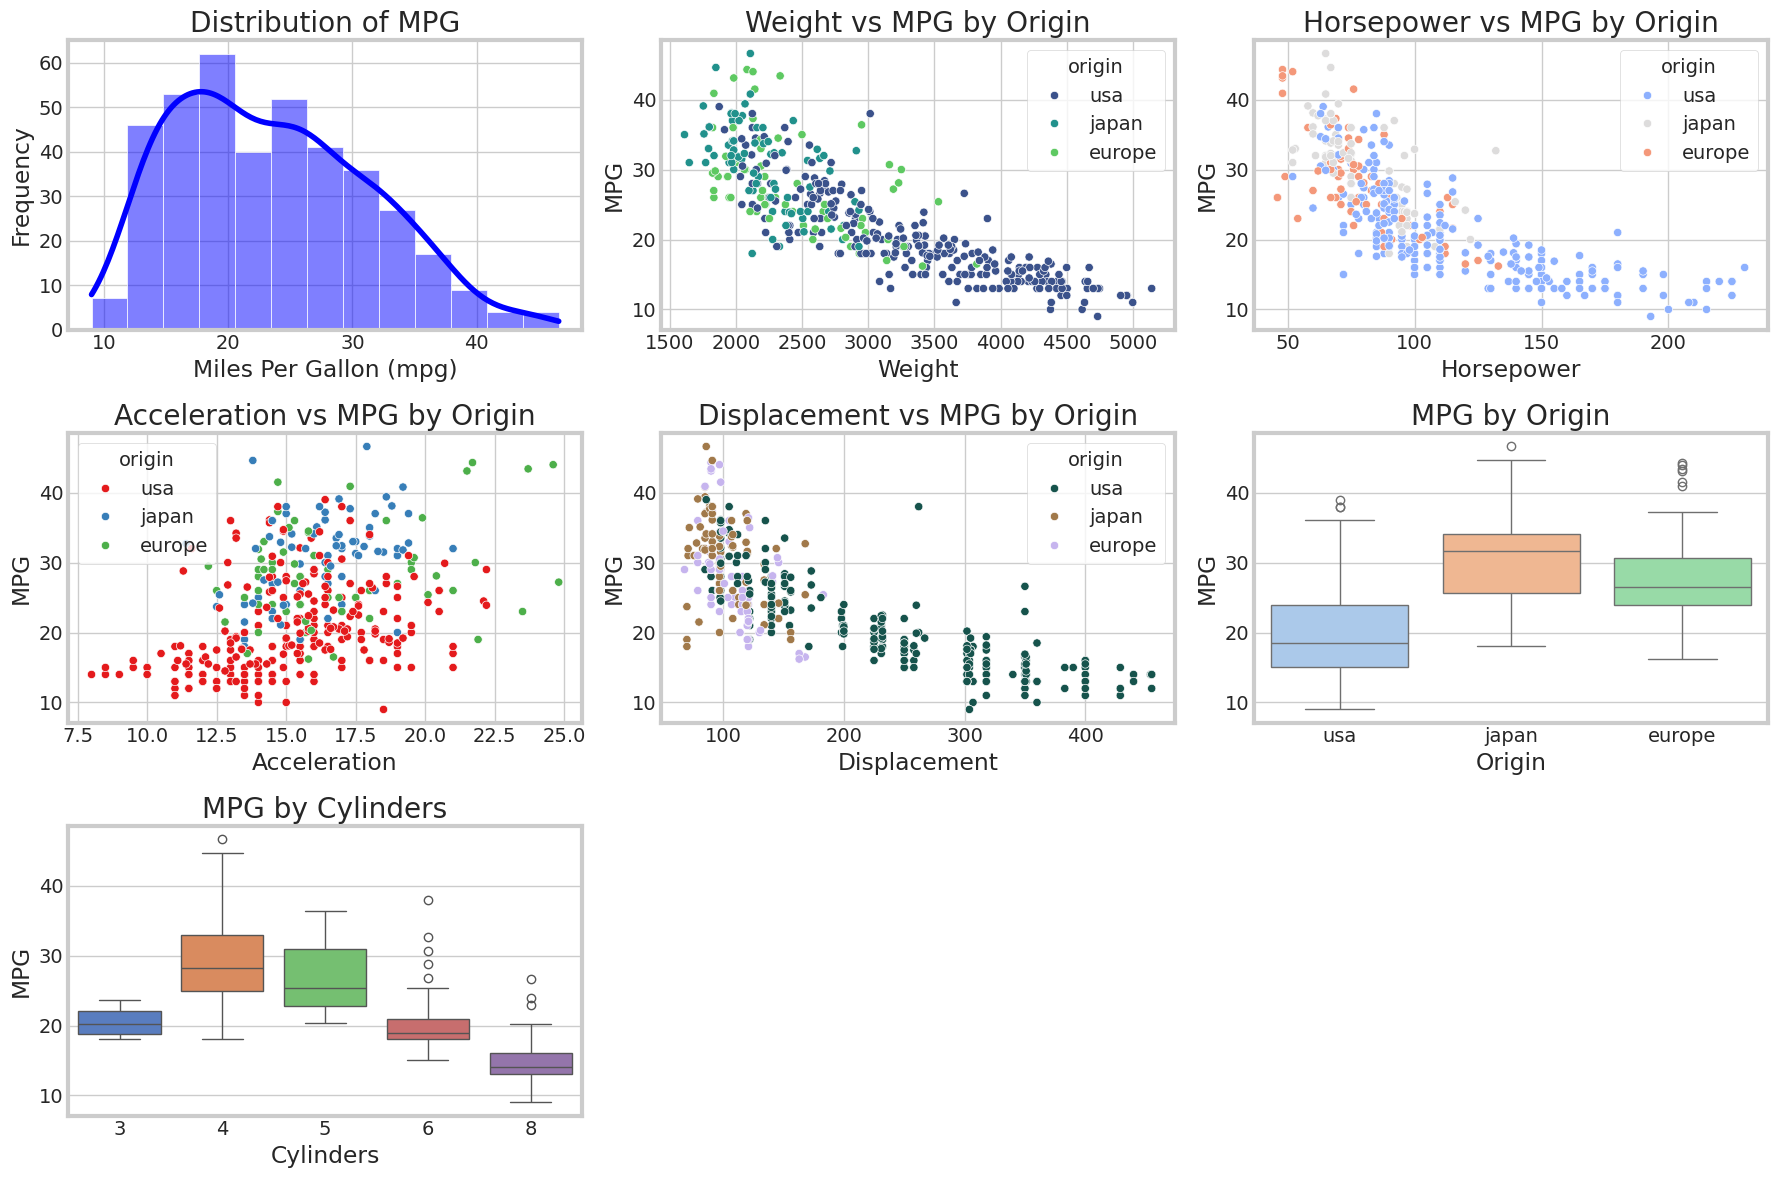

In [ ]:
# Univariate and Bivariate Analysis with mpg as the target variable

# Plot Setup
plt.figure(figsize=(18, 12))
sns.set_style("whitegrid")

# Visualization 1: Distribution of MPG (Miles Per Gallon)
plt.subplot(3, 3, 1)
sns.histplot(df['mpg'], kde=True, color='blue')
plt.title('Distribution of MPG')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Frequency')

# Visualization 2: Scatter plot of Weight vs MPG
plt.subplot(3, 3, 2)
sns.scatterplot(data=df, x='weight', y='mpg', hue='origin', palette='viridis')
plt.title('Weight vs MPG by Origin')
plt.xlabel('Weight')
plt.ylabel('MPG')

# Visualization 3: Scatter plot of Horsepower vs MPG
plt.subplot(3, 3, 3)
sns.scatterplot(data=df, x='horsepower', y='mpg', hue='origin', palette='coolwarm')
plt.title('Horsepower vs MPG by Origin')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Visualization 4: Scatter plot of Acceleration vs MPG
plt.subplot(3, 3, 4)
sns.scatterplot(data=df, x='acceleration', y='mpg', hue='origin', palette='Set1')
plt.title('Acceleration vs MPG by Origin')
plt.xlabel('Acceleration')
plt.ylabel('MPG')

# Visualization 5: Scatter plot of Displacement vs MPG
plt.subplot(3, 3, 5)
sns.scatterplot(data=df, x='displacement', y='mpg', hue='origin', palette='cubehelix')
plt.title('Displacement vs MPG by Origin')
plt.xlabel('Displacement')
plt.ylabel('MPG')

# Visualization 6: Boxplot of MPG by Origin
plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='origin', y='mpg', palette='pastel')
plt.title('MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')

# Visualization 7: Boxplot of MPG by Cylinders
plt.subplot(3, 3, 7)
sns.boxplot(data=df, x='cylinders', y='mpg', palette='muted')
plt.title('MPG by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')


plt.tight_layout()
plt.show()

# Menghitung Korelasi Menggunakan heatmap

In [ ]:
# Convert 'origin' column to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['origin'], prefix=['origin'])

# Calculate correlation
correlation = df.corr()
correlation

,mpg,horsepower,cylinders,displacement,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.776867,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.259022,0.442174,-0.568192
horsepower,-0.776867,1.000000,0.840897,0.893685,0.860028,-0.680214,-0.418124,-0.291160,-0.315771,0.489296
cylinders,-0.775396,0.840897,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.352861,-0.396479,0.604351
displacement,-0.804203,0.893685,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.373886,-0.433505,0.651407
weight,-0.831741,0.860028,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.298843,-0.440817,0.598398
acceleration,0.420289,-0.680214,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.204473,0.109144,-0.250806
model_year,0.579267,-0.418124,-0.348746,-0.370164,-0.306564,0.288137,1.000000,-0.024489,0.193101,-0.139883
origin_europe,0.259022,-0.291160,-0.352861,-0.373886,-0.298843,0.204473,-0.024489,1.000000,-0.229895,-0.597198
origin_japan,0.442174,-0.315771,-0.396479,-0.433505,-0.440817,0.109144,0.193101,-0.229895,1.000000,-0.643317
origin_usa,-0.568192,0.489296,0.604351,0.651407,0.598398,-0.250806,-0.139883,-0.597198,-0.643317,1.000000


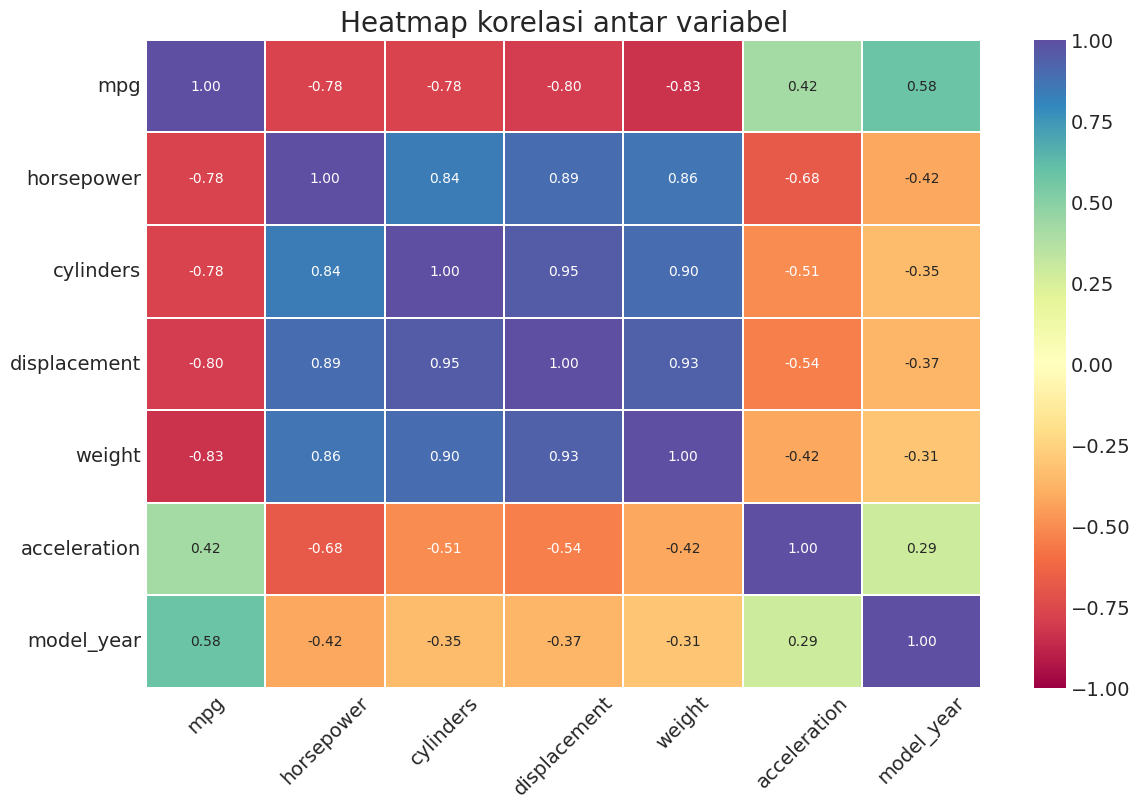

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung matriks korelasi
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Membuat heatmap menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="Spectral",
    vmin=-1,
    vmax=1,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    linewidths=0.1,
    annot_kws={"size": 10}
)
plt.xticks(rotation=45)
plt.title("Heatmap korelasi antar variabel")
plt.show()

# analisis regresi

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Pastikan dataset sudah bersih tanpa kolom yang tidak relevan (contohnya 'name')
# dan kolom kategoris sudah diubah menjadi dummy variables

# Mengimpor dataset (ganti 'data.csv' dengan file dataset Anda)
data = pd.read_csv('Automobile.csv')

# Pastikan kolom 'origin' menjadi dummy variables jika diperlukan
data_cleaned = pd.get_dummies(data.drop(columns=['name']), drop_first=True)

# Define formula dinamically (semua kolom kecuali 'mpg' dianggap sebagai prediktor)
independent_vars = " + ".join(data_cleaned.columns.drop('mpg'))  # Semua variabel kecuali target 'mpg'
formula = f'mpg ~ {independent_vars}'

# Fit model regresi menggunakan Ordinary Least Squares (OLS)
model = smf.ols(formula=formula, data=data_cleaned).fit()

# Menampilkan ringkasan regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          4.61e-142
Time:                        15:58:22   Log-Likelihood:                -1035.8
No. Observations:                 398   AIC:                             2090.
Df Residuals:                     389   BIC:                             2126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -15.2366 

Y Topi =β0 + β1X1 + β2X2 + β3X3 + β4X4 + β5X5 + β6X6 + β7X7 + β8X8

MPG = -15.2366 + 0.0831(origin_japan) - 2.7909(origin_usa) - 0.4275(Cylinders) + 0.0243(Displacement) - 0.0182(horsepower) - 0.0069(wight) + 0.0795(acceleration) + 0.7783(model_year)

In [ ]:
# Membentuk nilai prediksi
prediksi = model.predict(data_cleaned)  # Use data_cleaned instead of x
print(prediksi.head())

0    15.034959
1    14.105398
2    15.324833
3    15.084337
4    14.989059
dtype: float64


In [ ]:
# Membentuk nilai residual
residual = model.resid
print(residual.head())

0    2.965041
1    0.894602
2    2.675167
3    0.915663
4    2.010941
dtype: float64


# hipotesis

uji f

In [ ]:
import numpy as np
from scipy.stats import f
import statsmodels.api as sm

# Definisikan alfa
alfa = 0.05

# Definisikan variabel dependen dan independen
x = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = data['mpg']

# Menambahkan konstanta (intercept) pada variabel independen
x = sm.add_constant(x)

# Menyusun model OLS
model = sm.OLS(y, x).fit()

# F-statistic dan derajat bebas
fhitung = model.fvalue  # F-statistik dari model
df1 = x.shape[1] - 1  # Derajat bebas pembilang (jumlah variabel independen)
df2 = x.shape[0] - df1 - 1  # Derajat bebas penyebut (jumlah sampel - jumlah variabel - 1)

# Menghitung F-tabel
ftabel = f.ppf(1 - alfa, df1, df2)

# Menghitung P-Value
p_value = model.f_pvalue

output_with_pvalue = {
    "Nilai F tabel": ftabel,
    "Nilai F hitung": fhitung,
    "P-value": p_value,
    "Kesimpulan": "H0 ditolak" if fhitung > ftabel else "H0 gagal ditolak"
}
output_with_pvalue


{'Nilai F tabel': 2.121774088156171,
 'Nilai F hitung': 275.53301938944725,
 'P-value': 4.654378348916984e-137,
 'Kesimpulan': 'H0 ditolak'}

uji t

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Data
df = pd.DataFrame(data)

# Variabel dependen dan independen
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
y = data['mpg']

# Menambahkan konstanta untuk intercept
X = sm.add_constant(X)

# Handle missing or infinite values in 'X'
X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Replace infinite values with NaN and then drop rows with NaNs
y = y[X.index]  # Update 'y' to match the remaining rows in 'X'


# Membuat model OLS
# Fixed: Changed y1 to y to match the target variable
model = sm.OLS(y, X).fit()

# Mengambil t-statistik dan koefisien
t_stats = model.tvalues
p_values = model.pvalues

# Menampilkan hasil uji t untuk setiap koefisien
print("\nUji T untuk setiap koefisien:")
for var, t_stat, p_value in zip(X.columns, t_stats, p_values):
    print(f"Koefisien {var}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Menentukan tingkat signifikansi
alpha = 0.05

# Menghitung t-tabel untuk dua sisi (uji dua sisi)
n = len(df)  # Jumlah data
df1 = n - X.shape[1]  # Derajat bebas (n - k - 1)

# Menghitung t-tabel
t_tabel = stats.t.ppf(1 - alpha / 2, df1)
print(f"\nNilai t-tabel : {t_tabel:.4f}")

# Menentukan keputusan untuk setiap koefisien berdasarkan t-hitung dan t-tabel
for var, t_stat, p_value in zip(X.columns, t_stats, p_values):
    if abs(t_stat) > t_tabel:
        print(f"Tolak H0 untuk koefisien {var}, terdapat pengaruh signifikan.")
    else:
        print(f"Gagal tolak H0 untuk koefisien {var}, tidak terdapat pengaruh signifikan.")


Uji T untuk setiap koefisien:
Koefisien const: t-statistic = -2.9688, p-value = 0.0032
Koefisien cylinders: t-statistic = -0.8070, p-value = 0.4202
Koefisien displacement: t-statistic = 1.0537, p-value = 0.2927
Koefisien horsepower: t-statistic = -0.2834, p-value = 0.7770
Koefisien weight: t-statistic = -10.4359, p-value = 0.0000
Koefisien acceleration: t-statistic = 0.6501, p-value = 0.5160
Koefisien model_year: t-statistic = 14.3876, p-value = 0.0000

Nilai t-tabel : 1.9660
Tolak H0 untuk koefisien const, terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien cylinders, tidak terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien displacement, tidak terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien horsepower, tidak terdapat pengaruh signifikan.
Tolak H0 untuk koefisien weight, terdapat pengaruh signifikan.
Gagal tolak H0 untuk koefisien acceleration, tidak terdapat pengaruh signifikan.
Tolak H0 untuk koefisien model_year, terdapat pengaruh signifikan.


Uji Asumsi

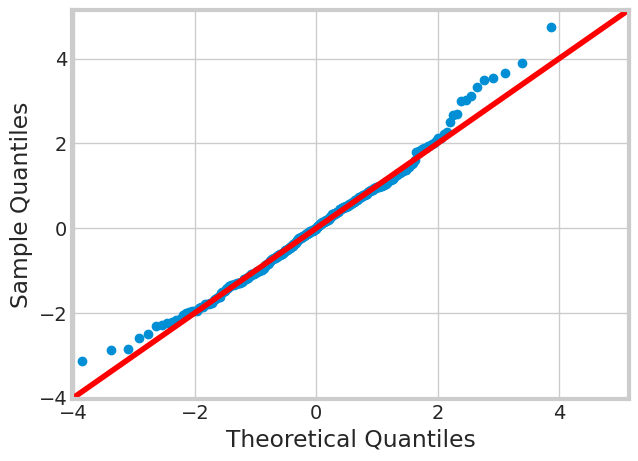

In [ ]:
# memeriksa asumsi residual berdistribusi normal

import scipy.stats as stats

fig = sm.qqplot(residual, stats.t, fit=True, line="45")
plt.show()

In [ ]:
# Pengujian Jarque Bera untuk memeriksa asumsi residual
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name,test)

[('Jarque-Bera', 58.20875360056729),
 ('Chi^2 two-tail prob.', 2.291552209378931e-13),
 ('Skew', 0.6298470869318725),
 ('Kurtosis', 4.3868115165146975)]

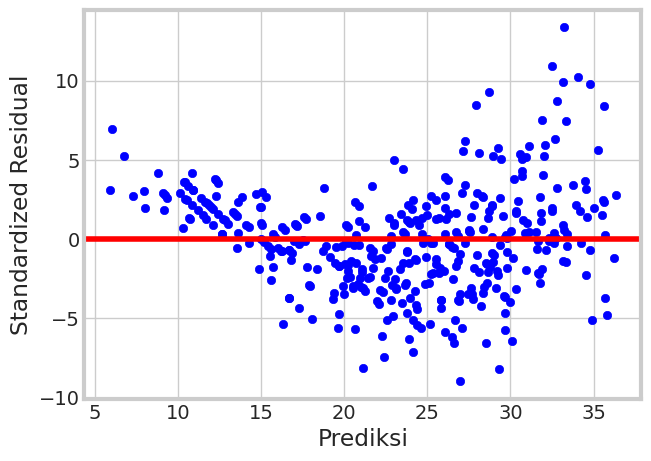

[('Lagrange multiplier statistic', 29.85182655551032), ('p-value', 4.1941681708501366e-05), ('f-value', 5.284133321463874), ('f p-value', 2.9698234431733414e-05)]


In [ ]:
# memeriksa asumsi residual tidak terjadi heteroskedastisitas

import numpy as np
import statsmodels.stats.diagnostic as sms
import matplotlib.pyplot as plt

# Menghapus nilai NaN dari residual dan prediksi
mask = ~np.isnan(residual) & ~np.isnan(prediksi)  # Membuat masker yang menghilangkan NaN
residual_std_clean = residual[mask]  # Data residual yang sudah dibersihkan dari NaN
prediksi_clean = prediksi[mask]  # Data prediksi yang sudah dibersihkan dari NaN

# Scatter Plot untuk visualisasi setelah menghapus NaN
plt.scatter(prediksi_clean, residual_std_clean, color='blue')
plt.axhline(0, color='red')
plt.xlabel('Prediksi')
plt.ylabel('Standardized Residual')
plt.show()

# Menghapus NaN dari residual dan data exogenous sebelum uji Breusch-Pagan
valid_data = ~np.isnan(model.resid) & ~np.isnan(model.model.exog).any(axis=1)  # Masker untuk residual dan exogenous
residual_valid = model.resid[valid_data]
exog_valid = model.model.exog[valid_data]

# Pengujian Breusch-Pagan pada data yang valid (tanpa NaN)
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(residual_valid, exog_valid)

# Menampilkan hasil uji Breusch-Pagan
result = list(zip(name, test))
print(result)


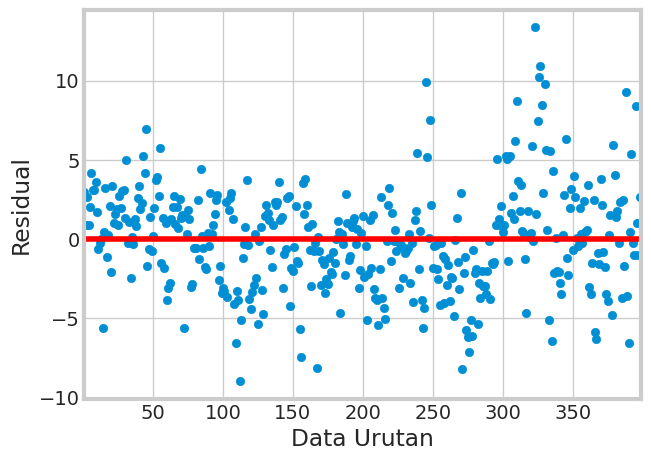

In [ ]:
# memeriksa asumsi residual tidak terjadi autokorelasi

import pandas as pd
import matplotlib.pyplot as plt

n_residuals = len(residual)
urutan_pengamatan = pd.Series(range(1, n_residuals + 1))

plt.scatter(urutan_pengamatan, residual)
plt.axhline(0, color='red')
plt.xlabel('Data Urutan')
plt.ylabel('Residual')
plt.xlim(1, n_residuals + 1)
plt.show()

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Memeriksa apakah variabel independen memenuhi asumsi tidak terjadi multikolinieritas.
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Replace infinite or NaN values with a finite number
X_no_inf = X.replace([np.inf, -np.inf], np.nan).fillna(0)

vif_data["VIF"] = [variance_inflation_factor(X_no_inf.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,const,739.909675
1,cylinders,10.551447
2,displacement,19.640057
3,horsepower,8.466801
4,weight,10.334461
5,acceleration,2.444295
6,model_year,1.249414
